In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

#### Nesa etapa iremos fazer a definição de tipos, bem como o tratamentos dos dados faltantes,normalização, discretização e limpeza do dados. Todo o processo de pré processamento.

In [43]:
###Essa base é a base seed, através dos ids dos jogadores, iremos fazer os joins até chegar
###na base final utilizada nessa etapa
df_users_seed = pd.read_csv("SummonerFinalData.csv", index_col = 'accountId')

### Lista das 10 ultimas partidas de cada jogador na base seed. 
df_matches_acc_id = pd.read_csv("matchByAccounbtIdFiltered10.csv", index_col = 'accountId')

### Estatisticas de cada time dentro das partidas
df_match_stats = pd.read_csv("dataMatchesStats.csv", index_col = 'gameId')

### Estatisticas 
df_players_matches_stats = pd.read_csv("playersMatchesStats.csv", index_col = 'gameId')

In [44]:
####Print de algumas informações basicas######
print(df_users_seed.shape)
print(df_users_seed.dtypes)
df_users_seed.head()

(2661, 13)
Unnamed: 0        int64
tier             object
summonerId       object
summonerName     object
leaguePoints      int64
wins              int64
losses            int64
veteran            bool
inactive           bool
freshBlood         bool
hotStreak          bool
summonerLevel     int64
puuid            object
dtype: object


,Unnamed: 0,tier,summonerId,summonerName,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak,summonerLevel,puuid
accountId,,,,,,,,,,,,,
bk1m2_GS-2L9loYOKil6EbsEHnQOCY15LRVByLuQvjf46Cc,0,DIAMONDI,a6XNnr-OC1673HAJaeCorjI1T9Sbe7gYJIBpbsu_CllJIOI,LokiFc,39,192,184,False,False,False,False,291,AvAT9pAFILqL0Eo0kWmFOXug4KyIBh4QprnfHU4Ao2e3Bj...
B6nuFHgma2xw3B4ZYsSQeb38pgQxgajWykeB8OEZHm0sSO8,1,DIAMONDI,h_TlijF-s3RAtZaCyUVvBvgO-GGVuG60TqH3h7cTGrOKT18,lepanta,96,123,102,False,False,False,False,131,z2NP0f9IPVNevXHBEiZ5wjOHHwmqifJM0St3OpTjgI8xon...
4FnPhlgfii3JW283EbPr2Zl4ZPYoVdk6Qfjc7LIPP8MrZEI,2,DIAMONDI,8fb8V6VEtBGfFZgq3Fyv3eEJ43UQyIeFOCm0SKEQvgu673M,i still hate you,0,350,298,False,False,False,False,224,CZq0S_gurM-JdaLAI8mZxCHhvxWGSen9ipXUt6QCOkyNDz...
a3jbDn6LEGapOQp3ecrp3-PS2kUryxZ5NHXzQn40TsOT4tQ,3,DIAMONDI,alh23IJbh4qXrbhZns-7UZFVrF1z7fUkKaKGUaNcGbM65uA,shadyzïn,16,135,109,False,False,False,False,233,wADRcuNbUSKIB1uAIodgtv23LnbyrZZhTY5-TXAuDZoyzf...
hsiTGDBRyGqJ57_rcYgKYy-lnj4HVJJrBnviuc41KuaqsTo,4,DIAMONDI,DLlFV0Vyigj3Bm--a-DH-ADL54C8and8CGL_08TiFKU_-ig,lagartin safo,0,137,115,False,False,False,False,137,XnADRrwXtgMPlKMovnXyUvc31v_1H-0chebhzdZ7piXF31...


In [49]:
print(df_matches_acc_id.shape)
print(df_matches_acc_id.dtypes)
df_matches_acc_id.head()

(53720, 8)
platformId    object
gameId         int64
champion       int64
queue          int64
season         int64
timestamp      int64
role          object
lane          object
dtype: object


,platformId,gameId,champion,queue,season,timestamp,role,lane
accountId,,,,,,,,
bk1m2_GS-2L9loYOKil6EbsEHnQOCY15LRVByLuQvjf46Cc,BR1,2071507283,114,440,13,1601166961222,SOLO,TOP
bk1m2_GS-2L9loYOKil6EbsEHnQOCY15LRVByLuQvjf46Cc,BR1,2071513192,236,440,13,1601164763566,DUO,TOP
bk1m2_GS-2L9loYOKil6EbsEHnQOCY15LRVByLuQvjf46Cc,BR1,2071489057,518,440,13,1601162891562,SOLO,MID
bk1m2_GS-2L9loYOKil6EbsEHnQOCY15LRVByLuQvjf46Cc,BR1,2070505822,26,440,13,1601072969992,DUO_SUPPORT,BOTTOM
bk1m2_GS-2L9loYOKil6EbsEHnQOCY15LRVByLuQvjf46Cc,BR1,2068849483,518,450,13,1600906495790,DUO_SUPPORT,NONE


In [46]:
print(df_match_stats.shape)
print(df_match_stats.dtypes)
df_match_stats.head()

(60654, 16)
teamId                   int64
win                     object
firstBlood                bool
firstTower                bool
firstInhibitor            bool
firstBaron                bool
firstDragon               bool
firstRiftHerald           bool
towerKills               int64
inhibitorKills           int64
baronKills               int64
dragonKills              int64
vilemawKills             int64
riftHeraldKills          int64
dominionVictoryScore     int64
bans                    object
dtype: object


,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans
gameId,,,,,,,,,,,,,,,,
2063497560,100,Win,False,False,False,True,False,False,6,1,1,2,0,0,0,"[{'championId': 143, 'pickTurn': 1}, {'champio..."
2063497560,200,Fail,True,True,True,False,True,True,7,1,0,2,0,2,0,"[{'championId': 8, 'pickTurn': 6}, {'championI..."
2071427119,100,Fail,False,False,False,False,False,False,1,0,0,0,0,0,0,[]
2071427119,200,Win,True,True,True,False,False,False,4,2,0,0,0,0,0,[]
2069993439,100,Fail,False,False,False,False,False,False,0,0,0,0,0,0,0,[]


In [47]:
print(df_players_matches_stats.shape)
print(df_players_matches_stats.dtypes)
df_players_matches_stats.head()

(303252, 13)
champion              int64
spell1                int64
spell2                int64
win                    bool
kills                 int64
deaths                int64
assists               int64
totalDamageDealt      int64
goldEarned            int64
champLevel            int64
totalMinionsKilled    int64
item0                 int64
item1                 int64
dtype: object


,champion,spell1,spell2,win,kills,deaths,assists,totalDamageDealt,goldEarned,champLevel,totalMinionsKilled,item0,item1
gameId,,,,,,,,,,,,,
2063497560,53,4,14,True,1,4,9,24558,7223,13,41,3050,3857
2063497560,79,4,11,True,13,2,15,181277,13186,16,29,3020,3157
2063497560,51,4,7,True,1,8,8,104542,9518,14,160,3094,1038
2063497560,61,12,4,True,15,0,8,152303,13942,16,201,3040,2055
2063497560,420,12,4,True,4,2,3,126026,10285,16,168,3071,1054


In [7]:
####Dropando essa coluna intrusa
df_users_seed.drop('Unnamed: 0', axis = 1, inplace=True)

## Ajuste de Tipos

In [9]:
### Ajuste de tipos da base de usuários

df_users_seed['tier'] = df_users_seed['tier'].astype('category')
df_users_seed['summonerId'] = df_users_seed['summonerId'].astype('string')
df_users_seed['summonerName'] = df_users_seed['summonerName'].astype('string')
df_users_seed['puuid'] = df_users_seed['puuid'].astype('string')

print(df_users_seed.dtypes)
print(df_users_seed['tier'].cat.categories)

tier             category
summonerId         string
summonerName       string
leaguePoints        int64
wins                int64
losses              int64
veteran              bool
inactive             bool
freshBlood           bool
hotStreak            bool
summonerLevel       int64
puuid              string
dtype: object
Index(['DIAMONDI', 'DIAMONDII', 'DIAMONDIII', 'DIAMONDIV', 'MASTER'], dtype='object')


In [10]:
### Ajuste de tipos da lista de partidas

df_matches_acc_id['platformId'] = df_matches_acc_id['platformId'].astype('string')
df_matches_acc_id['role'] = df_matches_acc_id['role'].astype('category')
df_matches_acc_id['lane'] = df_matches_acc_id['lane'].astype('category')

print(df_matches_acc_id.dtypes)
print(df_matches_acc_id['role'].cat.categories)
print(df_matches_acc_id['lane'].cat.categories)

platformId      string
gameId           int64
champion         int64
queue            int64
season           int64
timestamp        int64
role          category
lane          category
dtype: object
Index(['DUO', 'DUO_CARRY', 'DUO_SUPPORT', 'NONE', 'SOLO'], dtype='object')
Index(['BOTTOM', 'JUNGLE', 'MID', 'NONE', 'TOP'], dtype='object')


In [11]:
### Ajuste d etipos das estatisticas da partida
df_match_stats['win'] = df_match_stats['win'].astype('category')

print(df_match_stats.dtypes)
print(df_match_stats['win'].cat.categories)

teamId                     int64
win                     category
firstBlood                  bool
firstTower                  bool
firstInhibitor              bool
firstBaron                  bool
firstDragon                 bool
firstRiftHerald             bool
towerKills                 int64
inhibitorKills             int64
baronKills                 int64
dragonKills                int64
vilemawKills               int64
riftHeraldKills            int64
dominionVictoryScore       int64
bans                      object
dtype: object
Index(['Fail', 'Win'], dtype='object')


## Checagem de dados faltantes

In [12]:
def getMissData(df):
     return pd.DataFrame({'names' : df.columns, 'types' : df.dtypes, 'NA #': df.isna().sum(), 'NA %' : (df.isna().sum() / df.shape[0]) * 100})
    

In [13]:
### Dados faltantes
getMissData(df_users_seed)

,names,types,NA #,NA %
tier,tier,category,0,0.0
summonerId,summonerId,string,0,0.0
summonerName,summonerName,string,0,0.0
leaguePoints,leaguePoints,int64,0,0.0
wins,wins,int64,0,0.0
losses,losses,int64,0,0.0
veteran,veteran,bool,0,0.0
inactive,inactive,bool,0,0.0
freshBlood,freshBlood,bool,0,0.0
hotStreak,hotStreak,bool,0,0.0


In [14]:
getMissData(df_matches_acc_id)

,names,types,NA #,NA %
platformId,platformId,string,0,0.0
gameId,gameId,int64,0,0.0
champion,champion,int64,0,0.0
queue,queue,int64,0,0.0
season,season,int64,0,0.0
timestamp,timestamp,int64,0,0.0
role,role,category,0,0.0
lane,lane,category,0,0.0


In [15]:
getMissData(df_match_stats)

,names,types,NA #,NA %
teamId,teamId,int64,0,0.000000
win,win,category,2,0.003297
firstBlood,firstBlood,bool,0,0.000000
firstTower,firstTower,bool,0,0.000000
firstInhibitor,firstInhibitor,bool,0,0.000000
firstBaron,firstBaron,bool,0,0.000000
firstDragon,firstDragon,bool,0,0.000000
firstRiftHerald,firstRiftHerald,bool,0,0.000000
towerKills,towerKills,int64,0,0.000000
inhibitorKills,inhibitorKills,int64,0,0.000000


In [16]:
getMissData(df_players_matches_stats)

,names,types,NA #,NA %
champion,champion,int64,0,0.0
spell1,spell1,int64,0,0.0
spell2,spell2,int64,0,0.0
win,win,bool,0,0.0
kills,kills,int64,0,0.0
deaths,deaths,int64,0,0.0
assists,assists,int64,0,0.0
totalDamageDealt,totalDamageDealt,int64,0,0.0
goldEarned,goldEarned,int64,0,0.0
champLevel,champLevel,int64,0,0.0


**Como os dados foram obtidos através de api, não temos dados faltantes**

## Detecção de Outliers

**Base de Usuários**

In [17]:
df_users_seed.head()

,tier,summonerId,summonerName,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak,summonerLevel,puuid
accountId,,,,,,,,,,,,
bk1m2_GS-2L9loYOKil6EbsEHnQOCY15LRVByLuQvjf46Cc,DIAMONDI,a6XNnr-OC1673HAJaeCorjI1T9Sbe7gYJIBpbsu_CllJIOI,LokiFc,39,192,184,False,False,False,False,291,AvAT9pAFILqL0Eo0kWmFOXug4KyIBh4QprnfHU4Ao2e3Bj...
B6nuFHgma2xw3B4ZYsSQeb38pgQxgajWykeB8OEZHm0sSO8,DIAMONDI,h_TlijF-s3RAtZaCyUVvBvgO-GGVuG60TqH3h7cTGrOKT18,lepanta,96,123,102,False,False,False,False,131,z2NP0f9IPVNevXHBEiZ5wjOHHwmqifJM0St3OpTjgI8xon...
4FnPhlgfii3JW283EbPr2Zl4ZPYoVdk6Qfjc7LIPP8MrZEI,DIAMONDI,8fb8V6VEtBGfFZgq3Fyv3eEJ43UQyIeFOCm0SKEQvgu673M,i still hate you,0,350,298,False,False,False,False,224,CZq0S_gurM-JdaLAI8mZxCHhvxWGSen9ipXUt6QCOkyNDz...
a3jbDn6LEGapOQp3ecrp3-PS2kUryxZ5NHXzQn40TsOT4tQ,DIAMONDI,alh23IJbh4qXrbhZns-7UZFVrF1z7fUkKaKGUaNcGbM65uA,shadyzïn,16,135,109,False,False,False,False,233,wADRcuNbUSKIB1uAIodgtv23LnbyrZZhTY5-TXAuDZoyzf...
hsiTGDBRyGqJ57_rcYgKYy-lnj4HVJJrBnviuc41KuaqsTo,DIAMONDI,DLlFV0Vyigj3Bm--a-DH-ADL54C8and8CGL_08TiFKU_-ig,lagartin safo,0,137,115,False,False,False,False,137,XnADRrwXtgMPlKMovnXyUvc31v_1H-0chebhzdZ7piXF31...


**Existem 2 variáveis que podem ser consideradas outliers, Wins e Losses. Summoner Level não entra nessa detecção, pois até certo ponto ele tinha um limite de 30 e os valores, quaisquer que sejam, são importantes para os testes de hipotese.**

**Então vamos analisar as vitórias e derrotas do jogador**

In [18]:
df_users_seed[['wins','losses']].describe()

,wins,losses
count,2661.000000,2661.000000
mean,320.681323,290.610673
std,207.561816,206.441510
min,20.000000,8.000000
25%,172.000000,141.000000
50%,269.000000,239.000000
75%,421.000000,390.000000
max,1363.000000,1338.000000


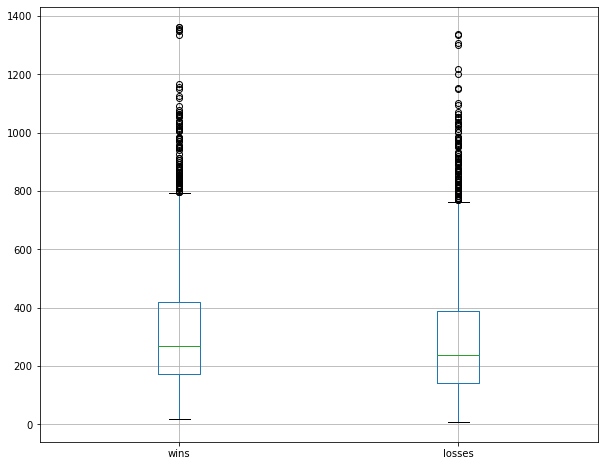

In [19]:
df_users_seed.boxplot(column=['wins', 'losses'],figsize=(10,8))

**Como alguns player jogam a mais tempo, não podemos analisar esses números isoladamente, por isso vamos ver em relação ao tempo de jogo, que podemos considerar como o Summoner Level**

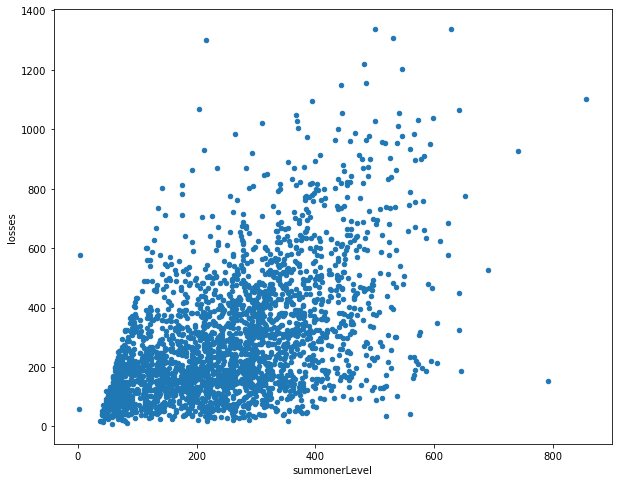

In [20]:
df_users_seed.plot.scatter(x='summonerLevel', y='losses',figsize=(10,8))

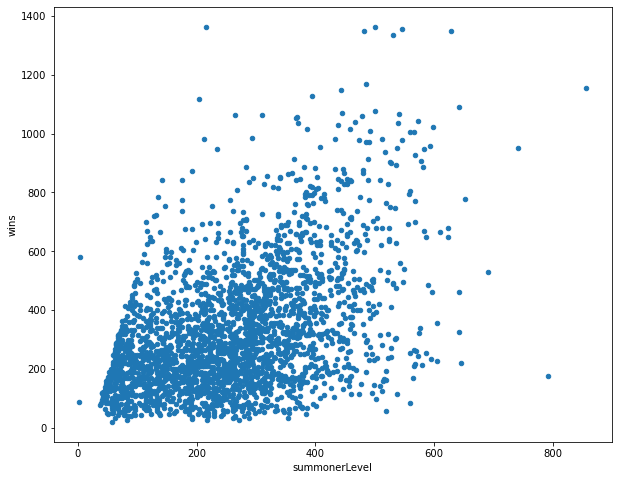

In [21]:
df_users_seed.plot.scatter(x='summonerLevel', y='wins',figsize=(10,8))

**O problema de usar o summoner level é porque até um certo tempo, existia um limite de level no League of Legends, onde jogadores podiam chegar somente até o level 30, mas o número de vitorias e derrotas continuava subindo. Por conta desse limite, faz sentido tentarmos agrupar por tiers**


In [22]:
df_users_by_tier = df_users_seed.groupby(['tier'])
df_users_by_tier[['wins','losses']].mean()

,wins,losses
tier,,
DIAMONDI,276.444444,252.752525
DIAMONDII,238.631313,220.585859
DIAMONDIII,224.860697,210.104478
DIAMONDIV,212.213198,200.507614
MASTER,355.835565,320.226567


DIAMONDI           AxesSubplot(0.1,0.679412;0.363636x0.220588)
DIAMONDII     AxesSubplot(0.536364,0.679412;0.363636x0.220588)
DIAMONDIII         AxesSubplot(0.1,0.414706;0.363636x0.220588)
DIAMONDIV     AxesSubplot(0.536364,0.414706;0.363636x0.220588)
MASTER                 AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

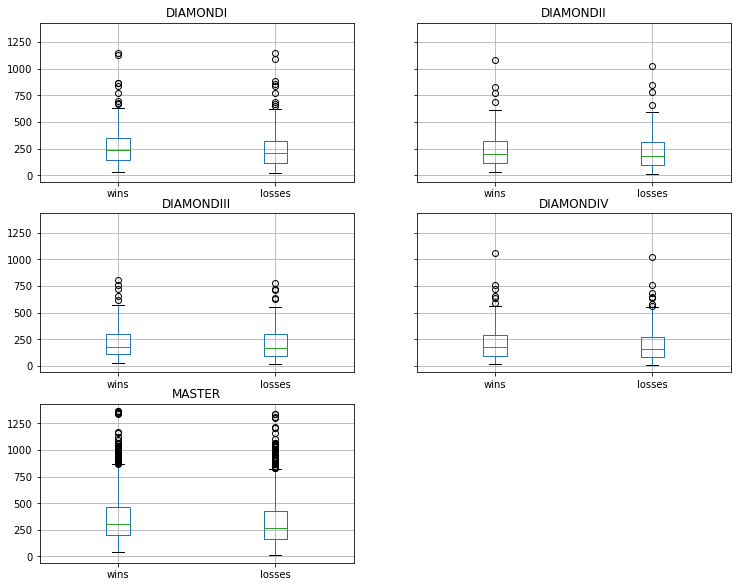

In [23]:
df_users_by_tier.boxplot(column=['wins','losses'],figsize=(12,10))

**Por tier nós entramos na questão se o jogador é bom ou não, então vale a pena vermos a relação entre as duas variáveis**

tier
DIAMONDI      AxesSubplot(0.125,0.125;0.775x0.755)
DIAMONDII     AxesSubplot(0.125,0.125;0.775x0.755)
DIAMONDIII    AxesSubplot(0.125,0.125;0.775x0.755)
DIAMONDIV     AxesSubplot(0.125,0.125;0.775x0.755)
MASTER        AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

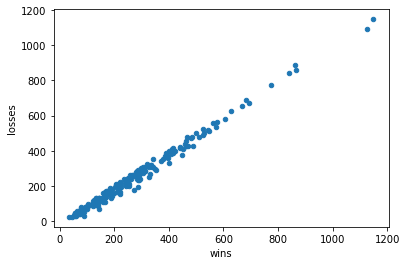

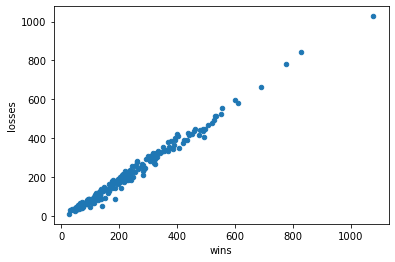

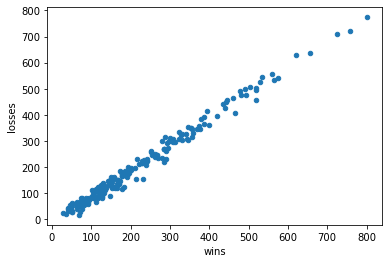

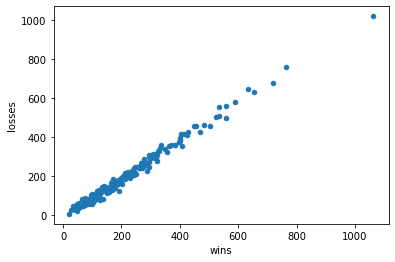

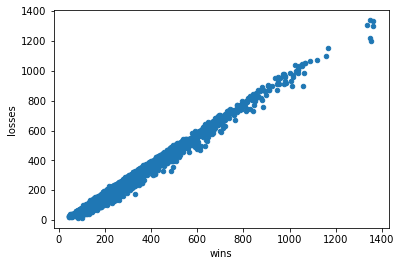

In [24]:
df_users_seed.groupby('tier').plot.scatter(x='wins', y='losses')

**Pelo grafico, podemos ver que o mais comum é a pessoa ter a mesma quantidade de vitórias que derrotas, então os valores não são necessáriamente outliers. Como último passo, iremos verificar o win rate do jogador, ou seja, quantas vitórias ele tem em relação ao total de partidas**

In [25]:
df_users_seed['win_rate'] = df_users_seed['wins']/(df_users_seed['wins'] + df_users_seed['losses'])
print(len(df_users_seed))
df_users_seed.head()

2661


,tier,summonerId,summonerName,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak,summonerLevel,puuid,win_rate
accountId,,,,,,,,,,,,,
bk1m2_GS-2L9loYOKil6EbsEHnQOCY15LRVByLuQvjf46Cc,DIAMONDI,a6XNnr-OC1673HAJaeCorjI1T9Sbe7gYJIBpbsu_CllJIOI,LokiFc,39,192,184,False,False,False,False,291,AvAT9pAFILqL0Eo0kWmFOXug4KyIBh4QprnfHU4Ao2e3Bj...,0.510638
B6nuFHgma2xw3B4ZYsSQeb38pgQxgajWykeB8OEZHm0sSO8,DIAMONDI,h_TlijF-s3RAtZaCyUVvBvgO-GGVuG60TqH3h7cTGrOKT18,lepanta,96,123,102,False,False,False,False,131,z2NP0f9IPVNevXHBEiZ5wjOHHwmqifJM0St3OpTjgI8xon...,0.546667
4FnPhlgfii3JW283EbPr2Zl4ZPYoVdk6Qfjc7LIPP8MrZEI,DIAMONDI,8fb8V6VEtBGfFZgq3Fyv3eEJ43UQyIeFOCm0SKEQvgu673M,i still hate you,0,350,298,False,False,False,False,224,CZq0S_gurM-JdaLAI8mZxCHhvxWGSen9ipXUt6QCOkyNDz...,0.540123
a3jbDn6LEGapOQp3ecrp3-PS2kUryxZ5NHXzQn40TsOT4tQ,DIAMONDI,alh23IJbh4qXrbhZns-7UZFVrF1z7fUkKaKGUaNcGbM65uA,shadyzïn,16,135,109,False,False,False,False,233,wADRcuNbUSKIB1uAIodgtv23LnbyrZZhTY5-TXAuDZoyzf...,0.553279
hsiTGDBRyGqJ57_rcYgKYy-lnj4HVJJrBnviuc41KuaqsTo,DIAMONDI,DLlFV0Vyigj3Bm--a-DH-ADL54C8and8CGL_08TiFKU_-ig,lagartin safo,0,137,115,False,False,False,False,137,XnADRrwXtgMPlKMovnXyUvc31v_1H-0chebhzdZ7piXF31...,0.543651


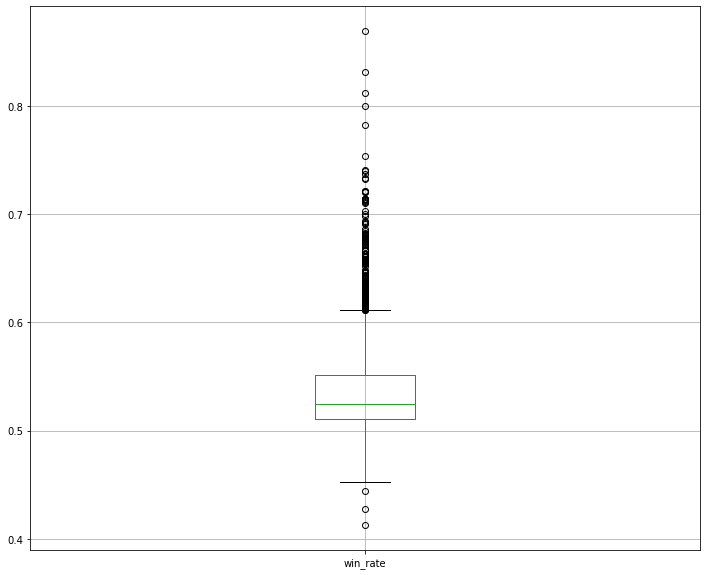

In [26]:
df_users_seed.boxplot(column=['win_rate'],figsize=(12,10))

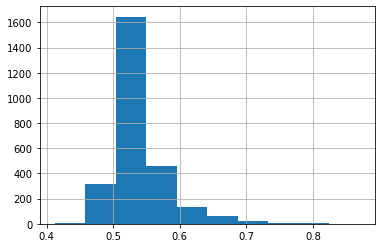

In [27]:
df_users_seed['win_rate'].hist()

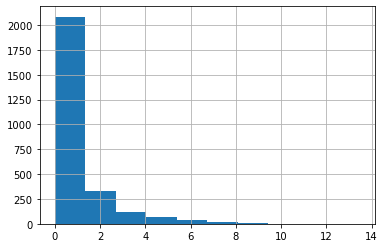

In [28]:
mad = abs(df_users_seed['win_rate'] - df_users_seed['win_rate'].median()).median()*(1/0.6745)
(abs(df_users_seed['win_rate']-df_users_seed['win_rate'].median())/mad).hist()

In [29]:
df_users_seed[abs(df_users_seed['win_rate']-df_users_seed['win_rate'].median())/mad > 3.5]

,tier,summonerId,summonerName,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak,summonerLevel,puuid,win_rate
accountId,,,,,,,,,,,,,
HLCPpSyD3IQL4aHR9IEaZhqVU7OIl3G9D2cQMwIKOmsK96o,DIAMONDI,8xh61Zffr8pH72q-d-jWF1ESWdFbFldCnl-p6OkVkZXOMSo,só palhaços,34,90,25,False,False,False,False,158,FoImH90MKxHB6G6fXqs7gW8ycomulFW8GN0Q6rRvPHaUzq...,0.782609
O81MTk_5wq55rNSTw3KGsWZ-Xwh2-IGKmCMLwlSUf2hN,DIAMONDI,_4s27hasIFMDXkzJWXP5W1pxqs_GLbFWORahXLUiCujbXQ,Revex,12,145,68,False,False,False,True,120,bJPOvn0CTWKe9IOyKTQVDwl4vb6qY_0JsVYCcKF__OU4hh...,0.680751
mIa-QDKylEPfN9jMk0LbduDQhVgAqmIAz1yu-Q0stsAyR84,DIAMONDI,Ct88oGux7QXpFjEdwix2Ms2T5lVIH8_DnNepSGnyofDiL0w,Darknesmad,35,60,28,False,False,False,False,120,uv_0WsTBHD56RI2k7Se0Kh7j8gFOO2s0jwZ7MlqRMazA5b...,0.681818
DWanLJtRb0LTORVprFnVqrvfsWbxkYVZhKY6hluxFAo,DIAMONDI,6M8-d_qPsvHSbIISOP_3JVUg7JaScL94OiBgCjP2zX_HMA,fox senpai,35,47,22,False,False,False,False,203,EaPzkFK3Q_a7xizayDgJS-p3QBSQgC5vBOWp4xI0LbHZBa...,0.681159
odoLCokySfgLv90hyprqcRas27Hje7S9egdbyreYm1Wl,DIAMONDI,bQhtUgfnHyqqropRmDmM14Bmm3OT41Lg-Is_JL3mreFldw,Mandiocafé,0,88,52,False,False,False,False,265,jksQTJfluC5sYtOY9Y1gNkK9yMt1m9Vn0sUHdy2iLaVWVT...,0.628571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
eM0-xLjJUuNM3DIZLr4D98_OVDLZNB9GMHoQSXFG3PxLCCTyzCU2-vpu,MASTER,XJq1c1FIaVFqOO5zj1Trfh4OPnf6wxbR8IxZ4SNRGvHz3Ho,zxhy,786,142,79,False,False,False,False,51,soUEM2Wmd0oRwUja7GjNYnuw2puHquhOgnpwQ9fsLcHWea...,0.642534
BpoLMGdbGcTW3YS7K0LufozJpu_mFsxt19JNxg4ccEtf3c8,MASTER,y5h7fFgsxF3QAOdYLtCKnN5IFyhBhKUPO8box_Zz8u95Rg,Tïmber,878,111,49,False,False,False,False,98,gP8pm-qTvtFK_v1NMsxbOfDqr5N734t-MfZ3yrHiKXf-jo...,0.693750
8SyQ1EctFJUrZWYxN9b1-gbZjfFW_1nsQFXTvjIPU81-Es8,MASTER,cN7EP0xR5T12BSZX24WiEeUGb1lWVz8-KpIS_0ZNQvIAyNI,gurincriveI,1088,109,52,False,False,False,False,80,NIfHDuRHdkiZZS4vhYLTJwBRLjtEnR7KzyAJi6-i_8BbVT...,0.677019


In [30]:
df_users_seed = df_users_seed[abs(df_users_seed['win_rate']-df_users_seed['win_rate'].median())/mad < 3.5]
print(len(df_users_seed))

2498


### Saindo um pouco dos dados ligados aos users, a base a seguir contem as estatistica relacionadas as partidas, estas por vez, podem ligadas ao usuário via id.

In [31]:
df_match_stats.columns

Index(['teamId', 'win', 'firstBlood', 'firstTower', 'firstInhibitor',
       'firstBaron', 'firstDragon', 'firstRiftHerald', 'towerKills',
       'inhibitorKills', 'baronKills', 'dragonKills', 'vilemawKills',
       'riftHeraldKills', 'dominionVictoryScore', 'bans'],
      dtype='object')

In [32]:
### O tipo

In [33]:
#Primeiramente através de uma matriz de correlação irei tentar encontrar algumas relações que determinam ou não uma vitoria.
#Como a coluna win é um categoria iremos trata-la para que entre na nossa analise de correlação.
df_dummies = pd.get_dummies(df_match_stats['win'],prefix="game")
df_match_stats_PP = pd.concat([df_match_stats, df_dummies], axis=1)


In [34]:
df_match_stats_PP.head(2)

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans,game_Fail,game_Win
gameId,,,,,,,,,,,,,,,,,,
2063497560,100,Win,False,False,False,True,False,False,6,1,1,2,0,0,0,"[{'championId': 143, 'pickTurn': 1}, {'champio...",0,1
2063497560,200,Fail,True,True,True,False,True,True,7,1,0,2,0,2,0,"[{'championId': 8, 'pickTurn': 6}, {'championI...",1,0


In [35]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
def generate_corr_matrix(df):
    corr = df.corr()
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );

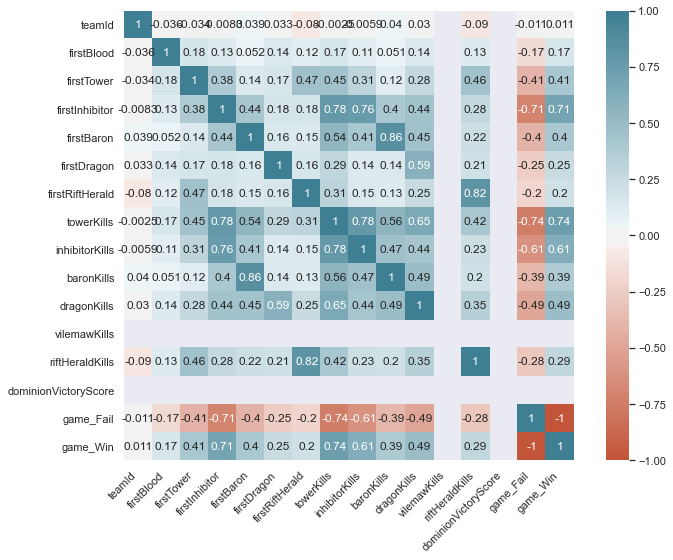

In [36]:
generate_corr_matrix(df_match_stats_PP)

#### Aqui para os valores mais escuros, acimas de 0,7 podemos ver algumas relações. Sendo as mais interessantesas ligadas ao ganhar o jogo ou nao.

In [37]:
df_players_matches_stats.head(10)

,champion,spell1,spell2,win,kills,deaths,assists,totalDamageDealt,goldEarned,champLevel,totalMinionsKilled,item0,item1
gameId,,,,,,,,,,,,,
2063497560,53,4,14,True,1,4,9,24558,7223,13,41,3050,3857
2063497560,79,4,11,True,13,2,15,181277,13186,16,29,3020,3157
2063497560,51,4,7,True,1,8,8,104542,9518,14,160,3094,1038
2063497560,61,12,4,True,15,0,8,152303,13942,16,201,3040,2055
2063497560,420,12,4,True,4,2,3,126026,10285,16,168,3071,1054
2063497560,64,4,11,False,4,4,1,151533,9526,13,20,3111,1412
2063497560,25,14,4,False,1,9,9,28987,7351,10,16,3157,3853
2063497560,498,4,7,False,4,8,5,134404,10830,13,211,3006,3508
2063497560,131,4,14,False,3,9,0,119454,9315,14,151,3100,3115


In [38]:
df_players_matches_stats.shape

(303252, 13)

In [39]:
###Podemos fazer o join dessas duas bases apresentadas, para tentar relacionar algumas e encontrar possiveis hipoteses

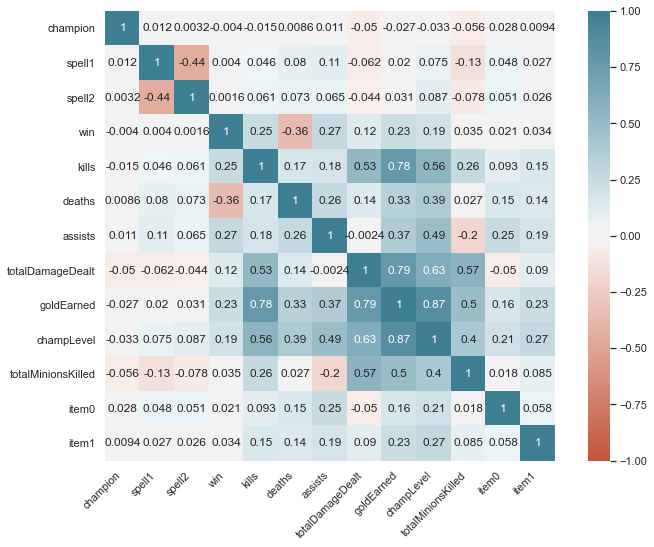

In [40]:
generate_corr_matrix(df_players_matches_stats)

**Save Post Processed Data**

In [41]:
df_users_seed.to_csv("SummonerFinalData_PP.csv")

df_matches_acc_id.to_csv("matchByAccounbtIdFiltered10_PP.csv")

df_match_stats.to_csv("dataMatchesStats_PP.csv")

df_players_matches_stats.to_csv("playersMatchesStats_PP.csv")